In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

2023-08-26 12:35:36.359096: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-26 12:35:36.473646: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 12:35:36.980837: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 12:35:36.983965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 12:35:38.410399: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
prom_file_path = "/home/wenjun/r10n9_continuous_data.parquet"

In [3]:
data = pd.read_parquet(prom_file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43196 entries, 118937550 to 126478703
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        43196 non-null  object        
 1   timestamp                                 43196 non-null  datetime64[ns]
 2   node                                      43196 non-null  object        
 3   node_time_seconds                         43196 non-null  float64       
 4   node_load15                               43196 non-null  float64       
 5   surfsara_power_usage                      43196 non-null  float64       
 6   up                                        43196 non-null  float64       
 7   node_netstat_Tcp_OutSegs                  43196 non-null  float64       
 8   node_netstat_Tcp_InErrs                   43196 non-null  float64       
 9   node_context_switches

In [5]:
data.columns

Index(['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
   

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [8]:
# Assuming 'data' is your numpy array and 'column_names' is your list of column names
column_names = ['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
       'node_filesystem_device_error-sum', 'node_disk_written_bytes_total-sum',
       'node_filesystem_free_bytes-sum', 'node_thermal_zone_temp-min',
       'node_thermal_zone_temp-mean', 'node_thermal_zone_temp-max',
       'node_disk_read_bytes_total-sum', 'nvidia_gpu_memory_used_bytes-sum',
       'nvidia_gpu_temperature_celsius-min',
       'nvidia_gpu_temperature_celsius-mean',
       'nvidia_gpu_temperature_celsius-max', 'node_arp_entries-sum',
       'nvidia_gpu_fanspeed_percent-min', 'nvidia_gpu_fanspeed_percent-mean',
       'nvidia_gpu_fanspeed_percent-max', 'node_filesystem_files_free-sum',
       'nvidia_gpu_power_usage_milliwatts-min',
       'nvidia_gpu_power_usage_milliwatts-sum',
       'nvidia_gpu_power_usage_milliwatts-mean',
       'nvidia_gpu_power_usage_milliwatts-max',
       'node_filesystem_size_bytes-sum',
       'node_disk_writes_completed_total-sum', 'nvidia_gpu_duty_cycle-min',
       'nvidia_gpu_duty_cycle-mean', 'nvidia_gpu_duty_cycle-max',
       'node_network_transmit_packets_total-sum', 'node_udp_queues-sum',
       'node_network_receive_bytes_total-sum',
       'node_network_receive_packets_total-sum',
       'node_network_receive_multicast_total-sum', 'node_disk_io_now-sum',
       'node_rapl_package_joules_total-sum',
       'node_network_receive_drop_total-sum', 'jobID', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s']  
df = pd.DataFrame(data, columns=column_names)

In [9]:
x = df['node_load1']
y = df['surfsara_power_usage']

In [10]:
idlePower = y.min()
maxPower = y.max()
factor = (maxPower - idlePower)/100
xMax = x.max()

Baseline RMSE: 100.388


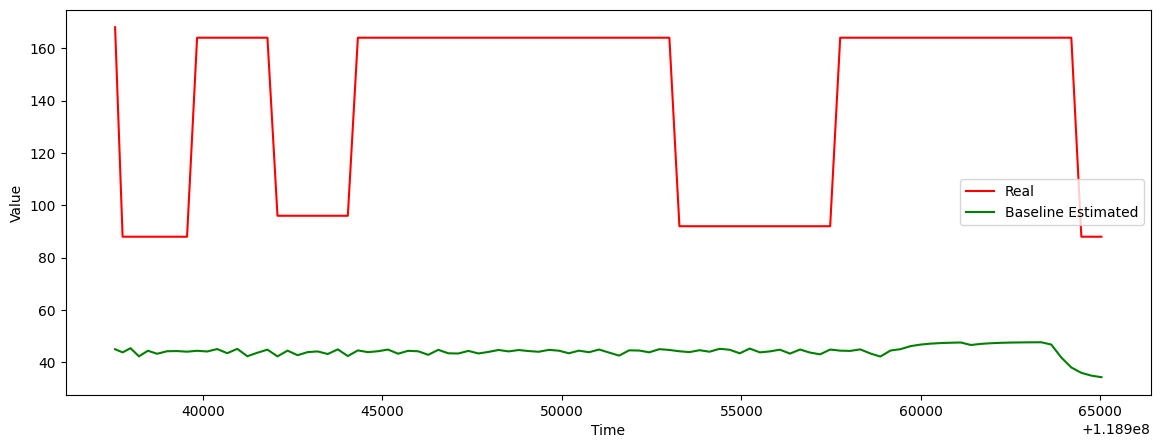

In [13]:
### Linear 
# Compute baseline_predictions
from sklearn.metrics import mean_squared_error
import math
import numpy as np

def compute_baseline(x, idlePower, factor, xMax):
    return idlePower if x == 0 else idlePower + factor * (x/xMax) * 100

baseline_predictions = x.apply(lambda value: compute_baseline(value, idlePower, factor, xMax))


# Now calculate the RMSE
baseline_mse = mean_squared_error(y[:100], baseline_predictions[:100])
baseline_rmse = math.sqrt(baseline_mse)
print('Baseline RMSE: %.3f' % baseline_rmse)


# Plot actual vs. baseline
plt.figure(figsize=(14,5))
plt.plot(y[:100], color = 'red', label = 'Real')
plt.plot(baseline_predictions[:100], color = 'green', label = 'Baseline Estimated')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
